<a href="https://colab.research.google.com/github/panharithyi/MSIT-ML/blob/main/ML_Lecture_14%2615_CNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Convolutional Neural Networks (CNNs)

In [ ]:
# import keras lib

import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# show shape
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [ ]:
# add another dimension to training set
x_train_3d = np.expand_dims(x_train, axis=3)
x_test_3d = np.expand_dims(x_test, axis=3)

# number of classes (0,1,2,3,4,5,6,7,8,9)
num_classes = 10

# add another dimension to target label
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
#show shape
print(x_train_3d.shape, y_train.shape)
print(x_test_3d.shape, y_test.shape)

(60000, 28, 28, 1) (60000, 10)
(10000, 28, 28, 1) (10000, 10)


## Model 1

In [ ]:
# 1.build a model

# accuracy on test data: 98.x%

model = keras.Sequential(
    [
        keras.Input(shape=(28, 28, 1)), # represent gray scale image (28x28)
     
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"), # Convolution Layer + ReLU layer
        layers.MaxPooling2D(pool_size=(2, 2)), # Pooling Layer 
     
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        
        layers.Flatten(), # reshape from 2D to 1D
        layers.Dense(10, activation="softmax")
    ]
)

## Model 2

In [ ]:
# 1.build a model

# accuracy on test data: 99.x%

model = keras.Sequential(
    [
        keras.Input(shape=(28, 28, 1)), # represent gray scale image (28x28)
     
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"), # Convolution Layer + ReLU layer
        layers.MaxPooling2D(pool_size=(2, 2)),
     
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
     
        layers.Dropout(0.5),

        layers.Flatten(), # reshape from 2D to 1D
        layers.Dense(10, activation="softmax")
    ]
)

## Model 3

In [ ]:
# 1.build a model

# accuracy on test data: ?

model = keras.Sequential(
    [
        keras.Input(shape=(28, 28, 1)), # represent gray scale image (28x28)
     
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"), # Convolution Layer + ReLU layer
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
     
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
     

        layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
     
        #layers.Dropout(0.5),

        layers.Flatten(), # reshape from 2D to 1D
        layers.Dense(10, activation="softmax")
    ]
)

In [ ]:
# plot a model
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_6 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 9216)              0         
                                                                 
 dense_2 (Dense)             (None, 10)                92170     
                                                                 
Total params: 110,986
Trainable params: 110,986
Non-trainable params: 0
________________________________________________

In [ ]:
# 2. Compile and train our model

opt = keras.optimizers.Adam(learning_rate=0.001) #default: 0.001
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

history = model.fit(x_train_3d, y_train, batch_size=128, epochs=25, validation_split=0.2) # 80% of 60000 for training, 20% of 60000 for validation

Epoch 1/25
375/375 [==============================] - 4s 8ms/step - loss: 0.1463 - accuracy: 0.9554 - val_loss: 0.0903 - val_accuracy: 0.9726
Epoch 2/25
375/375 [==============================] - 2s 7ms/step - loss: 0.0486 - accuracy: 0.9854 - val_loss: 0.0558 - val_accuracy: 0.9828
Epoch 3/25
375/375 [==============================] - 2s 7ms/step - loss: 0.0321 - accuracy: 0.9902 - val_loss: 0.0534 - val_accuracy: 0.9826
Epoch 4/25
375/375 [==============================] - 3s 7ms/step - loss: 0.0212 - accuracy: 0.9938 - val_loss: 0.0653 - val_accuracy: 0.9798
Epoch 5/25
375/375 [==============================] - 2s 7ms/step - loss: 0.0162 - accuracy: 0.9950 - val_loss: 0.0533 - val_accuracy: 0.9839
Epoch 6/25
375/375 [==============================] - 2s 7ms/step - loss: 0.0131 - accuracy: 0.9958 - val_loss: 0.0608 - val_accuracy: 0.9823
Epoch 7/25
375/375 [==============================] - 2s 7ms/step - loss: 0.0088 - accuracy: 0.9973 - val_loss: 0.0601 - val_accuracy: 0.9833
Epoch 

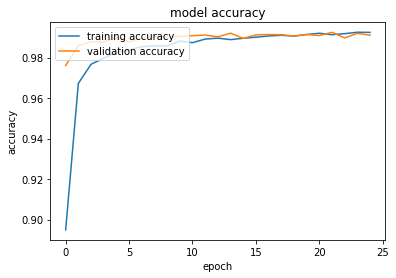

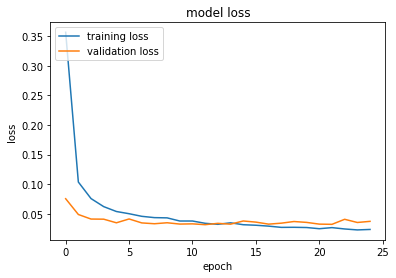

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracies
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training accuracy', 'validation accuracy'], loc='upper left')
plt.show()

# Plot losses
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training loss', 'validation loss'], loc='upper left')
plt.show()

In [ ]:
# evaluate our model on test set

score = model.evaluate(x_test_3d, y_test, verbose=0)
print("Test loss on test data:", score[0])
print("Test accuracy on test data (10000 images):", score[1])

Test loss on test data: 0.035628028213977814
Test accuracy on test data (10000 images): 0.9907000064849854


In [ ]:
model.save("my_model_99%.h5")

In [ ]:
from keras.models import load_model
my_model = load_model("/content/my_model_99%.h5")

In [ ]:
# evaluate our model on test set

score = model.evaluate(x_test_3d[:10], y_test[:10], verbose=0)
#print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test accuracy: 1.0
